# Project 2: Spam/Ham Prediction

In this project, you will use what you've learned in class to create a classifier that can distinguish spam emails from ham (non-spam) emails.

We'll walk you through a couple steps to get you started, but this project is almost entirely open-ended. Instead of providing you with a skeleton to fill in, we will evaluate your work based on your model's accuracy and your written responses in this notebook.

## Kaggle

This project is a bit different from the other assignments in this class because we are using Kaggle to evaluate your model's accuracy. Kaggle is a website that hosts machine learning competitions.

We've created a competition just for this project: https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3

Here's how submitting to Kaggle works:

1. You will create a classifier using the training dataset.
2. You will use your classifier to make predictions on the test dataset.
3. You will upload your predictions as a CSV to https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3
4. The website will tell you your accuracy on the test set. You may only do this twice a day. You must reach a test set accuracy of **88%** in order to get full credit for the Kaggle portion of the assignment.

(After the assignment ends, we will evaluate your accuracy on a private test set to ensure that you aren't overfitting to the test set.)

## Submission

This project has no ok tests (and no autograder). Instead, you will submit the following:

0. **Your notebook to OkPy**. You can do this by running the `ok.submit()` cell at the bottom of this notebook. Note that there is no autograder for this assignment so you will not receive autograder emails.
0. **Your notebook's written answers to GradeScope.** The cell to export the notebook is located at the bottom of this notebook. If you have trouble converting your notebook to PDF, you may upload your notebook to http://datahub.berkeley.edu/ and run the cell there.
0. **Your model's predictions on the test set to Kaggle**, a website that hosts machine learning competitions. Kaggle will output your your accuracy on the test set so that you will know whether you've met the accuracy threshold or not.

**To prevent you from fitting to the test set, you may only upload predictions to Kaggle twice per day.** This means you should start early. In addition, if you decide to pair with someone else, your group only gets two submissions per day (not four).

This project (notebook + Gradescope submissions) is officially due Friday, Dec 1 at 11:59:59pm since we can't make assignments due after classes end. However, we will accept submissions until **Monday, Dec 4 at 11:59:59pm** without using slip days. Submissions after Dec 4 will use 1 slip day each day after Dec 4. The Kaggle competition will remain open until **Saturday Dec 9 at 11:59:59pm**.

**No late Kaggle submissions will be accepted** since we've taken slip days into account when setting the Kaggle deadline. You will not use slip days for Kaggle submissions.

## Grading
Grading will be based on a number of set criteria, enumerated below:

Task | Description
--- | ---
Basic Classifier | You succesfully implement our guided basic logistic regression classifier.
EDA | You create four exploratory plots that help explain your feature choices.
Feature Selection | You explain and justify your feature selection process
Written Questions | You answer the written questions that we place throughout this notebook.
Kaggle Accuracy | Your model beats the prediction accuracy threshold of **88%**. This is attainable with a well-thought-out model.

**You are allowed to work in groups of 2 for this assignment!** If you decide to partner with someone else, make sure you do the following:

1. Have one person in the group invite the other on OkPy: https://okpy.org/cal/ds100/fa17/proj2/
1. Have one person in the group invite the other person on Gradescope.
1. Have one person in the group invite the other person on Kaggle: https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3

## Prizes

Although you need to reach 88% accuracy in order to get full credit, we will reward those that create great classifiers.

The top 10 students on the Kaggle leaderboard, evaluated by their score in the private test set will: 

1. Have bragging rights 
2. Be invited to attend a lunch at the Faculty Club, hosted by Professors Gonzalez and Nolan.

## Restrictions

While we want you to be creative with your models, we want to make it fair to students who are seeing these techniques for the first time.  As such, **you are only allowed to train logistic regression models and their regularized forms**.  This means no random forest, CART, neural nets, etc.  However, you are free to feature engineer to your heart's content.  Remember that domain knowledge is the third component of data science.

## Getting Started

In [1]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from IPython.display import display, Latex, Markdown, HTML, Javascript
from client.api.notebook import Notebook
ok = Notebook('proj2.ok')

Assignment: Project 2
OK, version v1.13.9



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import re
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf
%matplotlib inline

In [3]:
# Log into OkPy.
# You might need to change this to ok.auth(force=True) if you get an error
ok.auth(force=False)

Successfully logged in as kath.eddinger@berkeley.edu


For your convenience, run this cell to highlight the written response cells in light blue. Only the highlighted cells will be converted to the GradeScope PDF, so put your written answers there.

Unfortunately, you'll have to run this each time you open your notebook to highlight cells.

In [4]:
highlight_cells = '''
Jupyter.notebook.get_cells().map(function(cell) {
  var tags = cell.metadata.tags
  if (tags && tags.indexOf('written') >= 0)
    cell.element.css('background-color', '#efefff')
})
'''
display(Javascript(highlight_cells))

<IPython.core.display.Javascript object>

## Loading in the Data

The dataset consists of email messages and their labels (0 for ham, 1 for spam). The training set contains 8348 labeled examples, and the test set contains 1000 unlabeled examples.

Run the following cells to load in the data into DataFrames.

The `train` DataFrame contains labeled data that you will use to train your model. It contains three columns:

1. `id`: An identifier for the training example.
1. `subject`: The subject of the email
1. `email`: The text of the email.
1. `spam`: 1 if the email was spam, 0 if the email was ham (not spam).

The `test` DataFrame contains another set of 1000 unlabeled examples. You will predict labels for these examples and submit your predictions to Kaggle for evaluation.

In [5]:
train = pd.read_csv('train.csv')
train_upper = pd.read_csv('train.csv')
# We lower case the emails to make them easier to work with
train['EMAIL'] = train['email']
train['email'] = train['email'].str.lower()
# train.head()

In [6]:
test = pd.read_csv('test.csv')
test['EMAIL'] = test['email']
test['email'] = test['email'].str.lower()
# test.head()

### Question 1

In the cell below, print the text of the first ham and the first spam email in the training set. Then, discuss one thing you notice that is different between the two.

In [7]:
#Print the text of the first ham and the first spam emails. Then, fill in your response in the q01 variable:

print(train['email'].loc[train['spam'] == 0][0])
print(train['email'].loc[train['spam'] == 1][2])

url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 
 
 



In [8]:
q01 = '''
*The spam email contains some html text formatting (ham does not). Spam email has an http link with IP address,
while the ham links have website names with format 'blah.something'. The spam email uses language that is more informal
and direct, using personal pronouns ("you") and includes statements about preference ("would you rather...", 
"its up to you"). It is not informative, and it is implied that recipient must take some kind of action 
("come in here and see how") inorder to recieve the actual information.
The ham email is much more formal and does not use personal pronouns, indicating that the email was not meant
for any one person specifically, but for a group of people. It is a generic announcement, meant to be informative.
The recipients of this email do not need to be told that they should read the links, because they already know
what the content will be (i.e. more information about the bankrupcy and auctioning of a&l daily).
It also includes a sign off ("thanks, misha!").*
'''
display(Markdown(q01))


*The spam email contains some html text formatting (ham does not). Spam email has an http link with IP address,
while the ham links have website names with format 'blah.something'. The spam email uses language that is more informal
and direct, using personal pronouns ("you") and includes statements about preference ("would you rather...", 
"its up to you"). It is not informative, and it is implied that recipient must take some kind of action 
("come in here and see how") inorder to recieve the actual information.
The ham email is much more formal and does not use personal pronouns, indicating that the email was not meant
for any one person specifically, but for a group of people. It is a generic announcement, meant to be informative.
The recipients of this email do not need to be told that they should read the links, because they already know
what the content will be (i.e. more information about the bankrupcy and auctioning of a&l daily).
It also includes a sign off ("thanks, misha!").*


## Our First Features

We would like to take the text of an email and predict whether the text is ham or spam. This is a *classification* problem, so we will use logistic regression to make a classifier.

Recall that the input to logistic regression is a matrix $X$ that contains numeric values only. Unfortunately, our data are text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression.

Each row of $X$ is derived from one email example. Each column of $X$ is one feature. We'll guide you through creating a simple feature, and you'll create more interesting ones when you are trying to increase your accuracy.

### Question 2

Create a function called `words_in_text` that takes in a list of words and the text of an email. It outputs a pandas Series containing either a 0 or a 1 for each word in the list. The value of the Series should be 0 if the word doesn't appear in the text and 1 if the word does.

In [9]:
def words_in_text(words, text):
    '''
    Args:
        `words` (list of str): words to find
        `text` (str): string to search in
    
    Returns:
        Series containing either 0 or 1 for each word in words
        (0 if the word is not in text, 1 if the word is).
    '''
    return pd.Series([int(text.find(word) >= 0) for word in words])

# If these don't error, your function outputs the correct output for these examples
assert np.allclose(words_in_text(['hello'], 'hello world'),
                   [1])
assert np.allclose(words_in_text(['hello', 'bye', 'world'], 'hello world hello'),
                   [1, 0, 1])


### Question 3

Now, create a function called `words_in_texts` that takes in a list of words and a pandas Series of email texts. It should output a 2-dimensional NumPy matrix containing one row for each email text. The row should contain the output of `words_in_text` for each example. For example:

```python
>>> words_in_texts(['hello', 'bye', 'world'], pd.Series(['hello', 'hello world hello']))
array([[1, 0, 0],
       [1, 0, 1]])
```

You should be able to use the `.apply` and `.as_matrix` functions to implement this.

In [10]:
def words_in_texts(words, texts):
    '''
    Args:
        `words` (list of str): words to find
        `texts` (Series of str): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
        
    return np.array([words_in_text(words, text) for text in texts])

# If these don't error, your function outputs the correct output for these examples
assert np.allclose(words_in_texts(['hello', 'bye', 'world'], pd.Series(['hello', 'hello world hello'])),
                   np.array([[1, 0, 0], [1, 0, 1]]))



In [11]:
x = 'This is SPAM'
x = re.sub("[^\w]", " ", x).split()

In [12]:
def num_upper(text):
    '''
    Args:
        `text` (str): string to search in
    
    Returns:
        Series containing the number of uppercase words in `text`.
    '''
    
    if text:
        text = re.sub("[^\w]", " ", text).split() #split the text into a list of words
        
        return pd.Series(text).str.isupper().astype(int).sum() #number of uppercase words       

    else:
        return pd.Series([0])

def num_upper_in_texts(texts):
    '''
    Args:
    
        `texts` (Series of str): strings to search in
    
    Returns:
        NumPy array with shape (n) where n is the
        number of texts, containing the number of uppercase words in each text.
    '''
    
    #fill the series with with '0' when there is no subject
    texts = texts.fillna('0')

    return texts.apply(lambda x: num_upper(x))

def percent_upper(text):
    '''
    Args:
        `text` (str): string to search in
    
    Returns:
        Series containing percentage of uppercase words in text.
    '''
    
    if text:
        text = re.sub("[^\w]", " ", text).split() #split the text into a list of words
        
        return pd.Series(text).str.isupper().astype(int).sum() / pd.Series(len(text)) #percentage uppercase words
    else:
        return pd.Series([0]) #text with zero words won't be divided by zero, 

def percent_upper_in_texts(texts):
    '''
    Args:
    
        `texts` (Series of str): strings to search in
    
    Returns:
        NumPy array of percentages with shape (n) where n is the
        number of texts.
    '''
    
    #fill the series with with '0' when there is no subject
    texts = texts.fillna('0')

    return texts.apply(lambda x: percent_upper(x))




## Classification

Notice that the output of `words_in_texts` is a numeric matrix containing features for each email. This means we can use it directly to train a classifier.

### Question 4

We've given you 5 words that might be useful as features to distinguish spam/ham emails. Use these words as well as the `train` DataFrame to create two NumPy arrays: `X_train` and `y_train`.

`X_train` should be a matrix of 0s and 1s created by using your `words_in_texts` function on all the emails in the training set.

`y_train` should be vector of the correct labels for each email in the training set.

In [13]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email'])
y_train = train['spam']

X_train[:5], y_train[:5]

(array([[0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0]]), 0    0
 1    0
 2    1
 3    0
 4    0
 Name: spam, dtype: int64)

### Question 5

Now we have matrices we can give to scikit-learn! Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, train a logistic regression model using `X_train` and `y_train`. Then, output the accuracy of the model in the cell below. You should get an accuracy of around 0.7557.

In [14]:
CLF_word = LogisticRegression()

Word_fit = CLF_word.fit(X_train, y_train)

Word_score = Word_fit.score(X_train, y_train)

Word_CLF_preds = Word_fit.predict(X_train).reshape(-1, 1)

# Word_fit.coef_

Word_score

0.75574988021082889

### Question 6

That doesn't seem too shabby! But the classifier you made above isn't as great as you might think. Recall that we have other ways of evaluating a classifier:

*Sensitivity* (also called *recall*) is the rate of true positives; in this case, the proportion of spam emails that are classified as spam.

*Specificity* (also called *precision*) is the rate of true negatives; in this case, the proportion of ham emails that are classified as ham.

Answer the following questions in the light blue cell below. You may create other cells for scratch work, but your final answers
must appear in the light blue cell.

0. Suppose we have a classifier that just predicts 0 (ham) for every email. What is its sensitivity? Its specificity?
0. Suppose we have a classifier that just predicts 0 (ham) for every email. What is its accuracy on the training set?
0. Our logistic regression classifier got 75% prediction accuracy (number of correct predictions / total). Why is this a poor accuracy?
0. What is the sensitivity of the logistic regression classifier above? The specificity? What kind of mistake is our classifier more likely to make: false positives or false negatives?
0. Given the word features we gave you above, name one reason this classifier is performing poorly.

In [15]:
predicted_num_spam= Word_CLF_preds[:, 0].sum()
real_num_spam = y_train.sum()
predicted_num_ham = len(Word_CLF_preds[:, 0])- predicted_num_spam
real_num_ham = len(y_train) - real_num_spam

true_positive_tt = y_train[(Word_CLF_preds[:, 0] == y_train)].sum() #correctly predicted spam, hits
true_negative_ff = len(y_train[(Word_CLF_preds[:, 0] == y_train)]) - true_positive_tt #correct rejections
false_positive_tf = real_num_ham - true_negative_ff #false pos, ham classified as spam
false_negative_ft = real_num_spam - true_positive_tt #misses, spam classified as hm

sensitivity = true_positive_tt/(true_positive_tt + false_positive_tf)
specificity = true_negative_ff/(true_negative_ff + false_negative_ft)

print('true positives = ' + str(true_positive_tt),
      ', false postives = ' + str(false_positive_tf),
      ', false negatives = ' + str(false_negative_ft), 
      ', true negatives = ' + str(true_negative_ff))

print('sensitivity = ' + str(sensitivity))
print('specificity = ' + str(specificity))

true positives = 238 , false postives = 137 , false negatives = 1902 , true negatives = 6071
sensitivity = 0.6346666666666667
specificity = 0.7614448764580459


1. *The sensitivity (proportion of spam emails that are classified as spam) will be 0%, the specificity (proportion of ham emails classified as ham) will be 100%.*

2. *If we predict ham for every email, the accuracy on the training set would be 74% (the percentage of ham emails).*

3. *Our logisitic regression classifier is only predicting about 1% better than prediciting ham for every email, so its isn't very good.*

4. *The sensitivity of the logistic regression classifier is 63.5%, the specificity is 76.1%. The classifier is more likely to make false negatives (marking spam as ham).*

5. *The poor performance of our classifier tells us that our current words probably do not appear in many of the spam emails, or they appear in equally many spam emails as they do ham emails.*

## Moving Forward

With this in mind, it is now your assignment to make your classifier more accurate. In particular, in order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

To prevent you from fitting to the test set, you may only upload predictions to Kaggle twice per day. This means you should start early!

Here are some ideas for improving your model:

1. Finding better features based on the email text. For example, simple features that typically work for emails are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether or not the email is a reply to an earlier email or a forwarded email. 
    1. Using bag-of-words or [td-idf](http://www.tfidf.com/).
1. Finding better words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. (To help you out, we've given you a set of [English stopwords](https://www.wikiwand.com/en/Stop_words) in `stopwords.csv`)
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g., the regularization parameter) to achieve higher accuracy. 

Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features. However, we want to make it fair to students who are seeing these techniques for the first time.  As such, **you are only allowed to train logistic regression models and their regularized forms**. This means no random forest, k-nearest-neighbors, neural nets, etc.

We will not give you a code skeleton to do this, so feel free to create as many cells as you need in order to tackle this task. However, you should show us your process as outlined here:

### Feature/Model Selection Process

In this following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

1. *I came up with ideas based on the suggestions and what I saw in the first few rows of train. Then I created some features. I tried out each feature on its own to see how well it predicted. If it didn't do very well, I decided not to use that feature. I plotted my feature grouped by its spam or ham category to see if my feature was making any meaningful divisions. Another thing I did was look at model weights (for appropriately scaled features like words). I removed some of the words with zero weights.*
2. *I tried counting the number of uppercase words in the subject, but then I decided that the percentage of uppercase words might be more appropriate. The percentages worked better. I also tried a small number of words that I thought of myself, which wasn't very good and then I found about 460 or so spam words from the internet, which worked quite well.*
3. *When I looked at the weights for my word model alone, I was surprised that some of the words that I thought would be very indicative of spam had low or zero weights. I realized later that this could be due in part to other words or phrases that tend to co-occur in spam emails.*

In [16]:
#copy the train dataframe
new_train = train.copy()

#create columns of total uppercase word numbers
new_train['subj_num'] = num_upper_in_texts(train['subject'])
new_train['email_num']= num_upper_in_texts(train['EMAIL'])

#create a column of percentage of uppercase for subjects and emails
new_train['subj_up'] = percent_upper_in_texts(train['subject'])
new_train['email_up'] = percent_upper_in_texts(train['EMAIL'])

meta_train = new_train[:6261]
meta_test = new_train[6261:]

In [17]:
new_train.head()

,id,subject,email,spam,EMAIL,subj_num,email_num,subj_up,email_up
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0,URL: http://boingboing.net/#85534171\n Date: N...,2,4,0.222222,0.066667
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0,URL: http://scriptingnews.userland.com/backiss...,0,3,0.000000,0.061224
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1,<HTML>\n <HEAD>\n </HEAD>\n <BODY>\n <FONT SIZ...,1,17,0.142857,0.186813
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0,Depends on how much over spending vs. how much...,0,3,0.000000,0.012766
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0,hehe sorry but if you hit caps lock twice the ...,2,16,0.222222,0.045326


In [18]:
 spam_words = pd.Series(['Reverses','#1','Easy terms','Maintained','Reverses aging',
                         
                         '$$$','Make $','Risk free','‘Hidden’ assets', 
                         
                         'Rolex','Email harvest','Marketing',
                         
                         'Round the world','100% Satisfied','Email marketing', 'Marketing solutions',
                         
                         'S 1618','4U', 'Expect to earn', 'Mass email', 'Safeguard notice','50% off',
                         
                         'Explode your business','Medicine','Sale','Accept credit cards',
                         
                         'Extra income','Medium' ,'Sales','Acceptance','F r e e', 'Meet singles','Sample',
                         
                         'Access','Fantastic deal','Member','Satisfaction','Accordingly',
                         
                         'Fast cash','Member deal','Satisfaction guaranteed',
                         
                         'Act Now', 'Fast Viagra delivery','Message contains','Save $',
                         
                         'Act Now!','Financial freedom', 'Message contains disclaimer', 'Save big money',
                         
                         'Don’t hesitate!','Financially independent','Million','Save up to',
                         
                         'Ad', 'For free', 'Million dollars','Additional income', 'For instant access', 
                         
                         'Miracle', 'Search engine listings','Addresses on CD', 'For just $', 'MLM', 'Search engines',
                      
                         'Affordable', 'Money', 'Section 301','All natural','For Only',
                      
                         'Money back', 'See for yourself', 'All new', 'For you', 'Money making',
                      
                         'Sent in compliance', 'Amazing', 'Form', 'Month trial offer', 'Serious cash',
                      
                         'Amazing stuff', 'Free', 'More Internet Traffic', 'Serious only',
                     
                         'Apply now', 'Free access', 'Mortgage', 'Shopper','Apply Online',
                      
                         'Free cell phone', 'Mortgage rates', 'Shopping spree',
                      
                         'As seen on', 'Free consultation', 'Multi level marketing','Sign up free today',
                      
                         'Auto email removal', 'Free consultation', 'Multi-level marketing', 'Social security number',
                      
                         'Avoid', 'Free DVD', 'Name brand', 'Solution', 'Avoid bankruptcy', 'Free gift', 'Never',
                      
                         'Special promotion','Bargain', 'Free grant money', 'New customers only', 'Stainless steel',
                      
                         'Be amazed', 'Free hosting', 'New domain extensions', 'Stock alert',
                      
                         'Be your own boss', 'Free info', 'Nigerian', 'Stock disclaimer statement',
                      
                         'Being a member', 'Free installation', 'No age restrictions', 'Stock pick',
                      
                         'Beneficiary', 'Free Instant', 'No catch', 'Stop',
                      
                         'Best price', 'Free investment', 'No claim forms', 'Stop snoring',
                      
                         'Beverage', 'Free leads', 'No cost', 'Strong buy',
                      
                         'Big bucks', 'Free membership', 'No credit check', 'Stuff on sale',
                      
                         'Bill 1618', 'Free money', 'No disappointment', 'Subject to cash',
                      
                         'Billing address', 'Free offer', 'No experience', 'Subject to credit',
                      
                         'Billion', 'Free preview', 'No fees', 'Subscribe',
                      
                         'Billion dollars','Free priority mail', 'No gimmick', 'Success',
                      
                         'Bonus', 'Free quote', 'No hidden', 'Supplies are limited',
                      
                         'Brand new pager', 'Free sample', 'No inventory', 'Take action now',
                      
                         'Bulk email', 'Free trial', 'No investment', 'Talks about hidden charges',
                      
                         'Buy', 'Free website', 'No medical exams', 'Talks about prizes',
                      
                         'Buy direct', 'Freedom', 'No middleman', 'Teen',
                      
                         'Buying judgements', 'Friend','No obligation', 'this is an ad',
                      
                         'Buying judgments','Full refund', 'No purchase necessary','Terms and conditions',
                      
                         'Cable converter', 'Get', 'No questions asked', 'The best rates',
                      
                         'Call', 'Get it now', 'No selling', 'The following form',
                      
                         'Call free', 'Get out of debt', 'No strings attached', 'They keep your money – no refund',
                      
                         'Call now', 'Get paid', 'No-obligation', 'They’re just giving it away',
                      
                         'Calling creditors', 'Get started now', 'Not intended', 'This isn’t junk',
                      
                         'Cancel at any time', 'Gift certificate', 'Notspam', 'This isn’t spam',
                      
                         'Cannot be combined with any other offer', 'Give it away', 'Now', 'This won’t last',
                      
                         'Can’t live without', 'Giving away', 'Now only', 'Thousands',
                      
                         'Cards accepted', 'Great offer', 'Obligation', 'Time limited',
                      
                         'Cash', 'Guarantee', 'Off shore', 'Trial', 'Cash bonus', 'Guaranteed', 'Offer',
                      
                         'Undisclosed recipient', 'Cashcashcash', 'Have you been turned down?', 'Offer expires',
                      
                         'University diplomas', 'Casino', 'Hello', 'Once in lifetime', 'Unlimited',
                      
                         'Celebrity', 'Here', 'One hundred percent free', 'Unsecured credit',
                      
                         'Cell phone cancer scam', 'Hidden', 'One hundred percent guaranteed', 'Unsecured credit/debt',
                      
                         'Cents on the dollar', 'Hidden assets', 'One time', 'Unsecured debt',
                      
                         'Certified', 'Hidden charges', 'One time mailing', 'Unsolicited',
                      
                         'Chance', 'Home', 'Online biz opportunity', 'Unsubscribe',
                      
                         'Cheap', 'Home based', 'Online degree', 'Urgent',
                      
                         'Check', 'Home employment', 'Online marketing', 'US dollars',
                      
                         'Check or money order', 'Homebased business', 'Online pharmacy','Vacation',
                      
                         'Claims', 'Human growth hormone', 'Only', 'Vacation offers',
                      
                         'not selling anything', 'If only it were that easy', 'Only $', 'Valium',
                      
                         'in accordance with', 'Important information regarding', 'Open', 'Viagra',
                      
                         'legal', 'Opportunity','Viagra and other drugs',
                         
                         'Clearance', 'Income', 'Opt in', 'Vicodin',
                         
                         'Click', 'Income from home', 'Order', 'Visit our website',
                         
                         'Click below', 'Increase sales', 'Order now', 'Wants credit card',
                      
                         'Click here', 'Increase traffic', 'Order shipped by', 'Warranty',
                      
                         'Click to remove', 'Increase your sales', 'Order status', 'We hate spam',
                      
                         'Collect', 'Incredible deal', 'Order today', 'We honor all',
                      
                         'Collect child support', 'Info you requested', 'Orders shipped by', 'Web traffic',
                      
                         'Compare','Information you requested', 'Outstanding values','Weekend getaway',
                      
                         'Compare rates', 'Instant', 'Passwords', 'Weight loss',
                      
                         'Compete for your business', 'Insurance', 'Pennies a day', 'What are you waiting for?',
                      
                         'Confidentially on all orders', 'Internet market', 'Per day','While supplies last',
                      
                         'Congratulations','Internet marketing', 'Per week', 'While you sleep',
                      
                         'Consolidate debt and credit', 'Investment', 'Performance', 'Who really wins?',
                      
                         'Consolidate your debt', 'Investment decision', 'Phone', 'Why pay more?',
                      
                         'Copy accurately','It’s effective', 'Please read','Wife',
                      
                         'Copy DVDs','Potential earnings', 'Will not believe your eyes',
                      
                         'Cost', 'Join millions', 'Pre-approved', 'Win',
                      
                         'Costs', 'Join millions of Americans', 'Price', 'Winner',
                      
                         'Credit', 'Laser printer', 'Prices', 'Winner',
                      
                         'Credit bureaus', 'Leave', 'Print form signature','Winning',
                      
                         'Credit card offers', 'Legal', 'Print out and fax', 'Won',
                      
                         'Cures baldness', 'Life', 'Priority mail', 'Work at home',
                      
                         'Deal', 'Life Insurance', 'Prize','Work from home',
                      
                         'Dear friend', 'Lifetime', 'Prizes', 'Xanax',
                      
                         'Diagnostics', 'limited time', 'Problem', 'You are a winner!',
                      
                         'Dig up dirt on friends', 'Limited time offer','Produced and sent out','You have been selected'
                      
                         'Direct email' 	'Limited time only','Profits','You’re a Winner!',
                      
                         'Direct marketing','Loans', 'Promise you','Your income',
                      
                         'Discount','Long distance phone offer','Pure Profits','You’re a Winner!'
                      
                         'Do it today','Lose','Quote',
                      
                         'Don’t delete','Lose weight', 'Quotes', 'Don’t hesitate','Lose weight spam', 'Real thing',
                      
                         'Dormant', 'Lower interest rate', 'Refinance',
                      
                         'Double your','Lower interest rates','Refinance home',
                      
                         'Double your income','Lower monthly payment', 'Refinanced home',
                      
                         'Drastically reduced', 'Lower your mortgage rate', 'Removal instructions',
                      
                         'Earn','Lowest insurance rates','Remove',
                      
                         'Earn $','Lowest Price','Removes wrinkles', 'Earn extra cash' ,'Luxury car','Reserves the right'])
    
spam_words = spam_words.str.lower()
spam_words = spam_words.tolist()

In [19]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']
new_words = ['free', 'click', 'deal', 'order now', 'increase', 'money']

In [20]:
#create the word matrix using the meta training data, create the y meta training data (spam labels)
X_word = words_in_texts(spam_words, meta_train['email'])
y_meta_train = meta_train['spam']

In [21]:
#create a matrix of subject and email uppercase percentages
X_subj_up = (meta_train['subj_up']).as_matrix().reshape(-1, 1)
X_email_up = (meta_train['email_up']).as_matrix().reshape(-1, 1)

#create a matrix of the word feature space and subject and email uppercase percentage feature spaces
X_word_subj_email = np.hstack((X_word, X_subj_up, X_email_up))

# #create a classifier use it to fit and predict
CLF_word_subj_email = LogisticRegression()

Word_subj_email_up_fit = CLF_word_subj_email.fit(X_word_subj_email, y_meta_train)

Word_subj_email_up_score = Word_subj_email_up_fit.score(X_word_subj_email, y_meta_train)

Word_subj_email_up_pred = Word_subj_email_up_fit.predict(X_word_subj_email)

In [22]:
METATEST_X_word = words_in_texts(spam_words, meta_test['email'])

y_meta_test = meta_test['spam']

#create a matrix of subject uppercase percentages
METATEST_X_subj_up = (meta_test['subj_up']).as_matrix().reshape(-1, 1)

#create a matrix of email uppercase percentages
METATEST_X_email_up = (meta_test['email_up']).as_matrix().reshape(-1, 1)

#create a matrix of the word feature space and subject and email uppercase percentage feature spaces
METATEST_X_word_subj_email = np.hstack((METATEST_X_word, METATEST_X_subj_up, METATEST_X_email_up))

#use meta_train's classifier to score meta_test x and y
METATEST_Word_subj_email_up_score = Word_subj_email_up_fit.score(METATEST_X_word_subj_email, y_meta_test)

# get cross validated predictions and prediction scores for the words
CLF_word_CV = LogisticRegression(C=0.5)
METATEST_CV_preds = cross_val_predict(Word_subj_email_up_fit, METATEST_X_word_subj_email, y_meta_test)
METATEST_CV_score = cross_val_score(Word_subj_email_up_fit, METATEST_X_word_subj_email, y_meta_test)

In [23]:
METATEST_CV_score

array([ 0.92385057,  0.90948276,  0.92374101])

In [24]:
# #create a matrix of subject uppercase percentages
# X_subj_up = (new_train['subj_up']).as_matrix().reshape(-1, 1)

In [25]:
# from sklearn.decomposition import PCA

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import proj3d
# # pca = PCA(n_components=4)
# pca = PCA()

# proj = pca.fit_transform(X_word_subj_email)
# # proj = pca.fit_transform(X_word_subj_email)


In [26]:
# #Plot histogram of percentages
# # meta_train['email_up'].to_frame().plot.scatter()
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
# sns.regplot(meta_train['email_up'], meta_train['spam'], logistic=True, x_jitter=True)

In [27]:
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
# sns.distplot(meta_train.loc[meta_train['spam']==0, 'email_up'], norm_hist=True)
# sns.distplot(meta_train.loc[meta_train['spam']==1, 'email_up'], norm_hist=True)
# sns.distplot(meta_train.loc[meta_train['spam']==0, 'subj_up'], norm_hist=True)
# sns.distplot(meta_train.loc[meta_train['spam']==1, 'subj_up'], norm_hist=True) 

In [28]:
#see what predictions look like if we combind word feature and subj_up features
#create a matrix of word and subj_up

clf_word = LogisticRegression()

word_fit = clf_word.fit(X_word, y_meta_train)

word_pred = word_fit.predict(X_word)


clf_subj = LogisticRegression()

subj_fit = clf_subj.fit(X_subj_up, y_meta_train)

subj_pred = subj_fit.predict(X_subj_up)


clf_mail = LogisticRegression()

mail_fit = clf_mail.fit(X_email_up, y_meta_train)

mail_pred = mail_fit.predict(X_email_up)


X_word_subj = np.hstack((X_word, X_subj_up))

clf_word_subj = LogisticRegression()

word_subj_fit = clf_word_subj.fit(X_word_subj, y_meta_train)

word_subj_pred = word_subj_fit.predict(X_word_subj)


In [29]:
predicted_num_spam_word= word_pred.sum()
real_num_spam_word = y_meta_train.sum()
predicted_num_ham_word = len(word_pred)- predicted_num_spam_word
real_num_ham_word = len(y_meta_train) - real_num_spam_word

true_positive_word = y_meta_train[(word_pred == y_meta_train)].sum() #correctly predicted spam, hits
true_negative_word = len(y_meta_train[(word_pred == y_meta_train)]) - true_positive_word #correct rejections
false_positive_word = real_num_ham_word - true_negative_word #false pos, ham classified as spam
false_negative_word = real_num_spam_word - true_positive_word #misses, spam classified as hm

sensitivity_word = true_positive_word/(true_positive_word + false_positive_word)
specificity_word = true_negative_word/(true_negative_word + false_negative_word)

print('true positives = ' + str(true_positive_word),
      ', false postives = ' + str(false_positive_word),
      ', false negatives = ' + str(false_negative_word), 
      ', true negatives = ' + str(true_negative_word))

print('sensitivity = ' + str(sensitivity_word))
print('specificity = ' + str(specificity_word))

true positives = 1279 , false postives = 93 , false negatives = 300 , true negatives = 4589
sensitivity = 0.9322157434402333
specificity = 0.9386377582327674


In [30]:
predicted_num_spam_subj = subj_pred.sum()
real_num_spam_subj = y_meta_train.sum()
predicted_num_ham_subj = len(subj_pred)- predicted_num_spam_subj
real_num_ham_subj = len(y_meta_train) - real_num_spam_subj

true_positive_subj = y_meta_train[(subj_pred == y_meta_train)].sum() #correctly predicted spam, hits
true_negative_subj = len(y_meta_train[(subj_pred == y_meta_train)]) - true_positive_subj #correct rejections
false_positive_subj = real_num_ham_subj - true_negative_subj #false pos, ham classified as spam
false_negative_subj = real_num_spam_subj - true_positive_subj #misses, spam classified as hm

sensitivity_subj = true_positive_subj/(true_positive_subj + false_positive_subj)
specificity_subj = true_negative_subj/(true_negative_subj + false_negative_subj)

print('true positives = ' + str(true_positive_subj),
      ', false postives = ' + str(false_positive_subj),
      ', false negatives = ' + str(false_negative_subj), 
      ', true negatives = ' + str(true_negative_subj))

print('sensitivity = ' + str(sensitivity_subj))
print('specificity = ' + str(specificity_subj))

true positives = 171 , false postives = 31 , false negatives = 1408 , true negatives = 4651
sensitivity = 0.8465346534653465
specificity = 0.7676184188810035


In [31]:
predicted_num_spam_mail = mail_pred.sum()
real_num_spam_mail = y_meta_train.sum()
predicted_num_ham_mail = len(mail_pred)- predicted_num_spam_mail
real_num_ham_mail = len(y_meta_train) - real_num_spam_mail

true_positive_mail = y_meta_train[(mail_pred == y_meta_train)].sum() #correctly predicted spam, hits
true_negative_mail = len(y_meta_train[(mail_pred == y_meta_train)]) - true_positive_mail #correct rejections
false_positive_mail = real_num_ham_mail - true_negative_mail #false pos, ham classified as spam
false_negative_mail = real_num_spam_mail - true_positive_mail #misses, spam classified as hm

sensitivity_mail = true_positive_mail/(true_positive_mail + false_positive_mail)
specificity_mail = true_negative_mail/(true_negative_mail + false_negative_mail)

print('true positives = ' + str(true_positive_mail),
      ', false postives = ' + str(false_positive_mail),
      ', false negatives = ' + str(false_negative_mail), 
      ', true negatives = ' + str(true_negative_mail))

print('sensitivity = ' + str(sensitivity_mail))
print('specificity = ' + str(specificity_mail))

true positives = 417 , false postives = 82 , false negatives = 1162 , true negatives = 4600
sensitivity = 0.8356713426853707
specificity = 0.798333911836168


In [32]:
predicted_num_spam_FINAL = Word_subj_email_up_pred.sum()
real_num_spam_FINAL = y_meta_train.sum()
predicted_num_ham_FINAL = len(Word_subj_email_up_pred)- predicted_num_spam_FINAL
real_num_ham_FINAL = len(y_meta_train) - real_num_spam_FINAL

true_positive_FINAL = y_meta_train[(Word_subj_email_up_pred == y_meta_train)].sum() #correctly predicted spam, hits
true_negative_FINAL = len(y_meta_train[(Word_subj_email_up_pred == y_meta_train)]) - true_positive_FINAL #correct rejections
false_positive_FINAL = real_num_ham_FINAL - true_negative_FINAL #false pos, ham classified as spam
false_negative_FINAL = real_num_spam_FINAL - true_positive_FINAL #misses, spam classified as hm

sensitivity_FINAL = true_positive_FINAL/(true_positive_FINAL + false_positive_FINAL)
specificity_FINAL = true_negative_FINAL/(true_negative_FINAL + false_negative_FINAL)

print('true positives = ' + str(true_positive_FINAL),
      ', false postives = ' + str(false_positive_FINAL),
      ', false negatives = ' + str(false_negative_FINAL), 
      ', true negatives = ' + str(true_negative_FINAL))

print('sensitivity = ' + str(sensitivity_FINAL))
print('specificity = ' + str(specificity_FINAL))

true positives = 1301 , false postives = 83 , false negatives = 278 , true negatives = 4599
sensitivity = 0.940028901734104
specificity = 0.9429977445150708


### EDA

In the four light blue cells below, show us four different visualizations that you used to select features for your model. Each cell should output:

1. A plot showing something meaningful about the data that helped you during feature / model selection.
2. 2-3 sentences describing what you plotted and what its implications are for your features.

Feel to create as many plots as you want in your process of feature selection, but select four interesting ones for the cells below.

You should not show us more than one visualization for the same type of feature. For example, don't show us a bar chart of the number of emails that contain the word "hello" and a bar chart of the number of emails that contain the word "world". Each visualization should be conceptually distinct.

(note, I accidentally deleted one of the blue cells and could not get the highligher to re-highlight my first plot)1. This strip-plot shows how many uppercase words are in each email. This plot was useful to me because it shows that this feature does not do much to differentiate between spam and ham, which would be harder to determine using a bar plot.

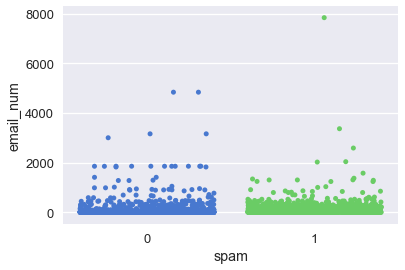

In [51]:
#this is the first graded EDA cell
some_string1 = '(note, I accidentally deleted one of the blue cells and could not get the highligher to re-highlight my first plot)1. This strip-plot shows how many uppercase words are in each email. This plot was useful to me because it shows that this feature does not do much to differentiate between spam and ham, which would be harder to determine using a bar plot.'

display(Markdown(some_string1))
sns.stripplot(x="spam", y="email_num",data=meta_train, jitter=0.4, split=True, palette="muted")

(2). This violin plot was useful because it shows the difference between distributions of spam and ham based on percentage of uppercase words in email subjects. The spam plot is more evenly distributed, while the ham plot has a wide and concentrated base, with a small secondary distribution that reaches up to about 40%. The small cluster of outliers in spam, which tells me that this feature is doing something to differentiate spam from ham.

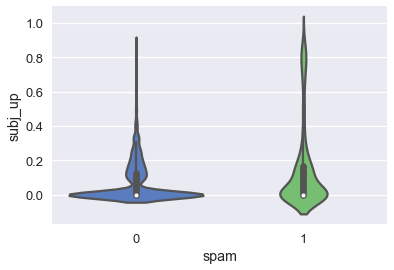

In [52]:
# This is the second graded EDA cell


some_string2 = '(2). This violin plot was useful because it shows the difference between distributions of spam and ham based on percentage of uppercase words in email subjects. The spam plot is more evenly distributed, while the ham plot has a wide and concentrated base, with a small secondary distribution that reaches up to about 40%. The small cluster of outliers in spam, which tells me that this feature is doing something to differentiate spam from ham.'

display(Markdown(some_string2))
sns.violinplot(x="spam", y="subj_up",data=meta_train, palette="muted")

This distribution plot was helpful to tell whether or not the percentage of uppercase in emails is doing anything to seperate spam from ham. You can see that ham (blue)has a high peak and small right tail which means that ham tends to cluster in a predicable way. Spam (green) has a wider distribution, showing that it is seperable from ham using this classifier.

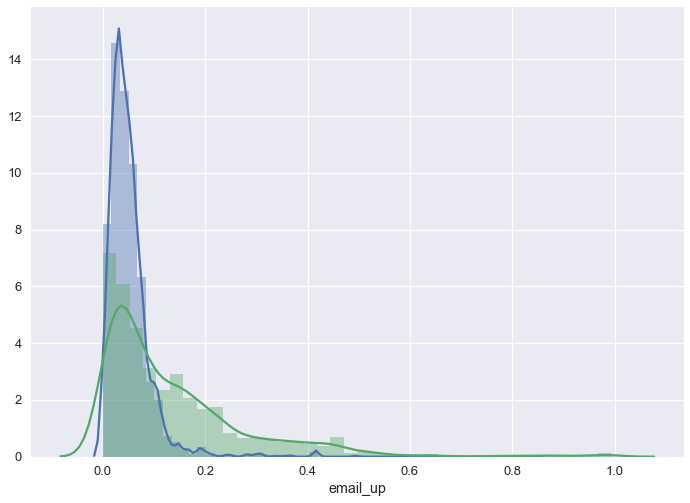

In [34]:
# This is the third graded EDA cell
some_string3 = 'This distribution plot was helpful to tell whether or not the percentage of uppercase in emails is doing anything to seperate spam from ham. You can see that ham (blue)has a high peak and small right tail which means that ham tends to cluster in a predicable way. Spam (green) has a wider distribution, showing that it is seperable from ham using this classifier.'

display(Markdown(some_string3))

fig3, ax3 = plt.subplots()
fig3.set_size_inches(11.7, 8.27)
sns.distplot(meta_train.loc[meta_train['spam']==0, 'email_up'], label = 'HAM')
sns.distplot(meta_train.loc[meta_train['spam']==1, 'email_up'], label = 'SPAM')  


This plot was useful in being able to tell the degree to which each classifier was affecting sensitivity versus specificity. This plot revealed an interesting different in the uppercase in email versusuppercase in subject classifiers as they achieve similar prediction accuracy, but seem to be explaining different parts of the variance.

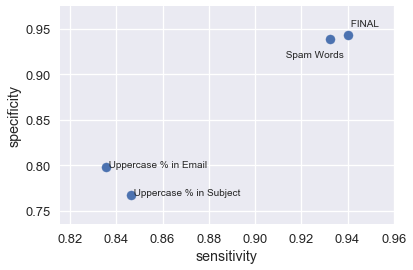

In [35]:
# This is the fourth graded EDA cell
some_string4 = 'This plot was useful in being able to tell the degree to which each classifier was affecting sensitivity versus specificity. This plot revealed an interesting different in the uppercase in email versusuppercase in subject classifiers as they achieve similar prediction accuracy, but seem to be explaining different parts of the variance.'

display(Markdown(some_string4))


fig4, ax4 = plt.subplots()
sensitivities = [sensitivity_mail, sensitivity_subj, sensitivity_word, sensitivity_FINAL]
specificities = [specificity_mail, specificity_subj, specificity_word, specificity_FINAL]
plt.scatter(sensitivities, specificities)
ax4.annotate(' Uppercase % in Email', xy=(sensitivities[0], specificities[0]))
ax4.annotate(' Uppercase % in Subject', xy=(sensitivities[1], specificities[1]))
ax4.annotate(' Spam Words', xy=(sensitivities[2], specificities[2]), xytext=(sensitivities[2]-0.02, specificities[2]-0.02))
ax4.annotate(' FINAL', xy=(sensitivities[3], specificities[3]), xytext=(sensitivities[3], specificities[3]+0.01))

plt.xlabel('sensitivity')
plt.ylabel('specificity')

### Making an ROC Curve

It turns out that there's a tradeoff between sensitivity and specificity. In most cases we won't be able to get perfect sensitivity and specificity, so we have to select which of two we value more. For example, in the case of cancer screenings we value specificity more because false negatives are comparatively worse than false positives — a false negative means that a patient might not discover a disease until it's too late to treat, while a false positive means that a patient will probably have to take another screening.

Recall that logistic regression calculates the probability that an example belongs to a certain class. Then, to classify an example we say that an email is spam if our classifier gives it >=0.5 probability of being spam. However, we can adjust that cutoff: we can say that an email is spam only if our classifier gives it >=0.7 probability of being spam, for example. This is how we can trade off sensitivity and specificity.

The ROC (receiver operating charactistic) curve shows this trade off for each possible cutoff probability. We will discuss this during lecture, and you can also read [this blog post for more information.](https://www.theanalysisfactor.com/what-is-an-roc-curve/).

In the light blue cell below, plot the ROC curve for your final classifier (the one you use to make predictions for Kaggle).

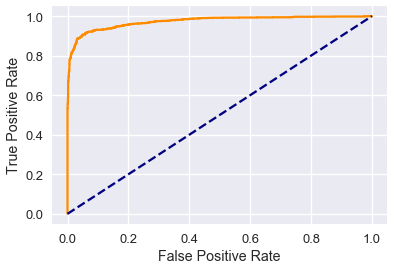

In [36]:
from sklearn.metrics import roc_curve

# Note that you'll want to use the .predict_proba(...) method for your classifier
# instead of .predict(...) so you get probabilities, not classes

clf_y = LogisticRegression()
y_fit = clf_y.fit(X_word_subj_email, y_meta_train)
y_hat = y_fit.predict_proba(X_word_subj_email)

spam_prob = y_hat[:, 1]
ham_prob = y_hat[:, 0]

fpr, tpr, thresholds = roc_curve(y_meta_train, spam_prob)

plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

The code below assumes that you've saved your predictions in a 1-dimensional array called `test_predictions`.

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3

In [37]:
# some_words77 = ['drug', 'bank', 'prescription', 'memo', 'private']

X_test = words_in_texts(spam_words, test['email'])
# y_train = test['spam']

#create a new dataframe called 'new_test' with a column of percent uppercase in subjects
new_test = test.copy()
new_test['subj_up'] = percent_upper_in_texts(test['subject'])

#create a column of percentage of uppercase in emails
new_test['email_up'] = percent_upper_in_texts(test['email'])

#create a matrix of subject uppercase percentages
X_subj_up77 = (new_test['subj_up']).as_matrix().reshape(-1, 1)

#create a matrix of email uppercase percentages
X_email_up77 = (new_test['email_up']).as_matrix().reshape(-1, 1)

#create a matrix of the word feature space and subject and email uppercase percentage feature spaces

FINAL_X_test = np.hstack((X_test, X_subj_up77, X_email_up77))


#use the classifier from the training data to predict

Word_subj_email_CLF_preds77 = CLF_word_subj_email.predict(X_word_subj_email)


#create a classifier for the CLF word/subject/email predictions and get cross validated predictions

# Word_subj_email_CV_preds77 = cross_val_predict(CLF_word_subj_email_CV, X_word_subj_email77)

In [38]:
FINAL_X_word = words_in_texts(spam_words, new_train['email'])

In [39]:
FINAL_X_word.shape

(8348, 424)

In [40]:
FINAL_y_train = new_train['spam']
FINAL_y_train.shape

(8348,)

In [41]:
#create a matrix of subject uppercase percentages
FINAL_X_subj_up = (new_train['subj_up']).as_matrix().reshape(-1, 1)

In [42]:
FINAL_X_subj_up.shape

(8348, 1)

In [43]:
#create a matrix of email uppercase percentages
FINAL_X_email_up = (new_train['email_up']).as_matrix().reshape(-1, 1)

In [44]:
FINAL_X_email_up.shape

(8348, 1)

In [45]:
#create a matrix of the word feature space and subject and email uppercase percentage feature spaces
FINAL_X_word_subj_email = np.hstack((FINAL_X_word, FINAL_X_subj_up, FINAL_X_email_up))

In [46]:
FINAL_clf = LogisticRegression()

FINAL_fit = FINAL_clf.fit(FINAL_X_word_subj_email, FINAL_y_train)

test_predictions = FINAL_fit.predict(FINAL_X_test)

In [47]:
test_predictions.shape

(1000,)

In [48]:
# from datetime import datetime

# # Assuming that your predictions on the test set are stored in a 1-dimensional array called
# # test_predictions. Feel free to modify this cell as long you create a CSV in the right format.
# assert isinstance(test_predictions, np.ndarray)
# assert test_predictions.shape == (1000, )

# submission_df = pd.DataFrame({
#     "Id": test['id'], 
#     "Class": test_predictions,
# }, columns=['Id', 'Class'])

# timestamp = datetime.isoformat(datetime.now()).split(".")[0]

# submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)
# print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
# print('You may now upload this CSV file to Kaggle for scoring.')

## Submission

Run the cell below to submit your notebook to OkPy:

In [49]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj2.ipynb'.
Submit... 100% complete
Submission successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/proj2/submissions/982znJ



Now, run this cell to create a PDF to upload to Gradescope.

In [50]:
!pip install -U gs100
from gs100 import convert
# Change the zoom argument if your font size is too small
convert('proj2.ipynb', num_questions=8, zoom=1)

Requirement already up-to-date: nbformat>=4 in /Users/katherineeddinger/anaconda3/envs/ds100/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: nbconvert>=5 in /Users/katherineeddinger/anaconda3/envs/ds100/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: pdfkit>=0.6 in /Users/katherineeddinger/anaconda3/envs/ds100/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: PyPDF2>=1.26 in /Users/katherineeddinger/anaconda3/envs/ds100/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: toolz>=0.8 in /Users/katherineeddinger/anaconda3/envs/ds100/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: beautifulsoup4>=4 in /Users/katherineeddinger/anaconda3/envs/ds100/lib/python3.6/site-packages (from gs100)
Requirement already up-to-date: jupyter-core in /Users/katherineeddinger/anaconda3/envs/ds100/lib/python3.6/site-packages (from nbformat>=4->gs100)
Requirement already up-to-date: traitlets

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj2.ipynb'.
Created question_pdfs/q_email.pdf
Created question_pdfs/q01.pdf
Created question_pdfs/q06.pdf
Created question_pdfs/q_feature.pdf
Created question_pdfs/q_eda2.pdf
Created question_pdfs/q_eda3.pdf
Created question_pdfs/q_eda4.pdf
Created question_pdfs/q_roc.pdf


WARNING  | converter.py:73 | We expected there to be 8 questions but there are only 8 in your final PDF. Gradescope will most likely not accept your submission. Double check that you wrote your answers in the cells that we provided.


If the font size of your PDF is too small/large, change the value of the zoom argument when calling convert. For example, setting zoom=2 makes everything twice as big.


Make sure to upload your PDF now. Otherwise, your written questions won't be graded.